<a href="https://colab.research.google.com/github/NickygenN1/SRCNN/blob/main/trainmodel_colab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import os
from google.colab import drive
drive.mount('/content/drive')

os.chdir('/content/drive/MyDrive/SRCNN')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [14]:
import torch
from torch import nn
from dataset import train_dataloader
from train import train_model
from model import SRCNN
import matplotlib.pyplot as plt

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

SRCNN_Model = SRCNN(in_channels=3)
model = SRCNN(in_channels=3).to(device)
optimizer = torch.optim.Adam(params=model.parameters(), lr=0.001)
loss_fn = nn.MSELoss()
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, factor=0.09, patience=10)
result = train_model(model, train_dataloader, optimizer, loss_fn, scheduler, epochs=1000)

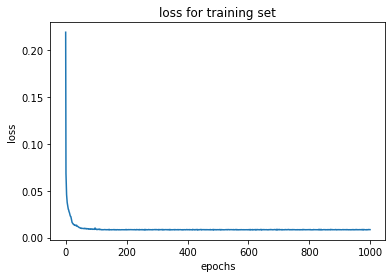

In [27]:
plt.plot([_ for _ in range(1000)], result['train_loss']);
plt.title('loss for training set')
plt.xlabel('epochs')
plt.ylabel('loss');